__DATA STORYTELLING__

In [1]:
#Load libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection


c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 
print("Loaded")


Loaded


In [2]:
#load the original dataset and assign it to dfmallcustomer dataframe
dfmallcustomer= pd.read_csv("datasets/Mall_Customers.csv")
#load the wrangled dataset and assign it to stmallcustomer - st stands for storytelling
stmallcustomer= pd.read_csv("datasets/dfmallcustomer.csv")

In [3]:
#check datasets
dfmallcustomer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
stmallcustomer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,Young Adult,Lower,Good Score
1,2,Male,Young Adult,Lower,Excellent Score
2,3,Female,Young Adult,Lower,Low Score
3,4,Female,Young Adult,Lower,Excellent Score
4,5,Female,Adult,Lower,Good Score


In [6]:
#describe data
dfmallcustomer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Female    56.0
Male      44.0
Name: Gender, dtype: float64


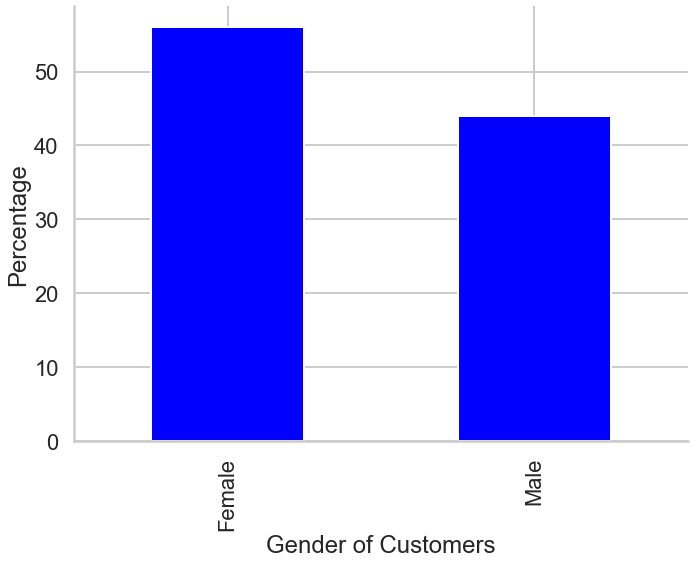

In [7]:
#distribution of gender
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
gender_percentage = dfmallcustomer.Gender.value_counts(dropna=False) / dfmallcustomer.shape[0] * 100
gender_percentage.plot(kind='bar',color='blue')
plt.xlabel('Gender of Customers')
plt.ylabel('Percentage')
print(gender_percentage)
sns.despine()

Females are 56% of the customers.

32    5.5
35    4.5
19    4.0
31    4.0
30    3.5
49    3.5
27    3.0
47    3.0
40    3.0
23    3.0
36    3.0
38    3.0
50    2.5
48    2.5
29    2.5
21    2.5
20    2.5
34    2.5
18    2.0
28    2.0
59    2.0
24    2.0
67    2.0
54    2.0
39    1.5
25    1.5
33    1.5
22    1.5
37    1.5
43    1.5
68    1.5
45    1.5
46    1.5
60    1.5
41    1.0
57    1.0
66    1.0
65    1.0
63    1.0
58    1.0
26    1.0
70    1.0
42    1.0
53    1.0
52    1.0
51    1.0
44    1.0
55    0.5
64    0.5
69    0.5
56    0.5
Name: Age, dtype: float64


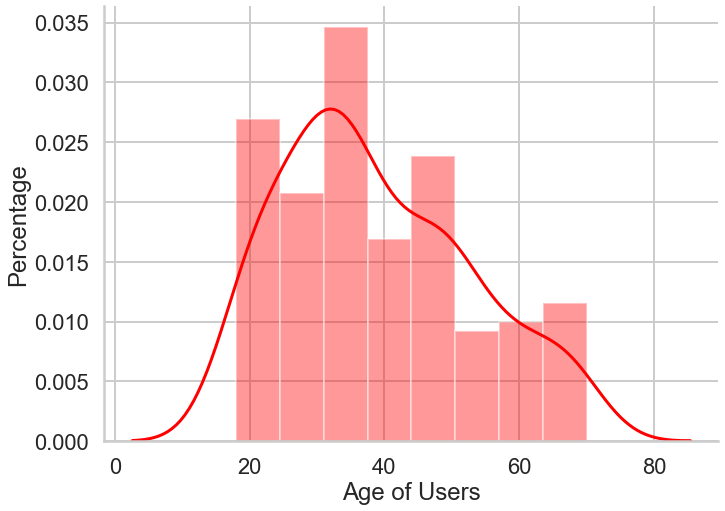

In [9]:
#distribution of customers ages.
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
age_percentage = dfmallcustomer.Age.value_counts(dropna=False) / dfmallcustomer.shape[0] * 100
sns.distplot(dfmallcustomer.Age.dropna(), color='red')
plt.xlabel('Age of Users')
plt.ylabel('Percentage')
sns.despine()
print(age_percentage)

As seen in the plot above, most of the users are between 18 and 50.  

54     6.0
78     6.0
60     3.0
87     3.0
62     3.0
      ... 
61     1.0
126    1.0
59     1.0
58     1.0
15     1.0
Name: Annual Income (k$), Length: 64, dtype: float64


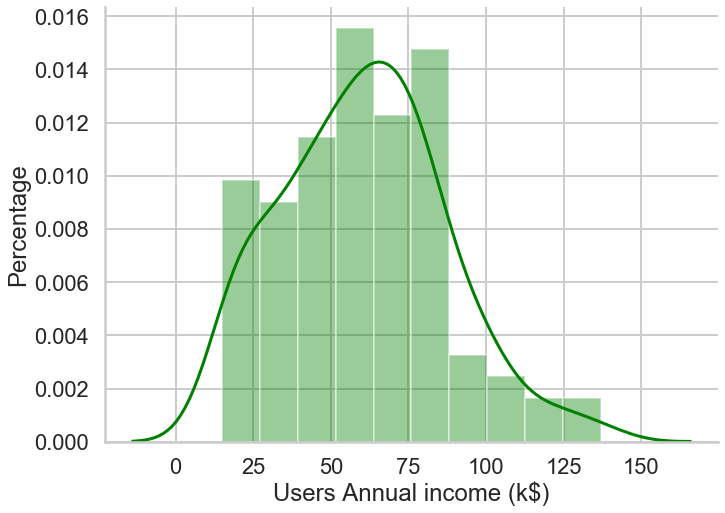

In [12]:
#distribution of annual income
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
income_percentage = dfmallcustomer['Annual Income (k$)'].value_counts(dropna=False) / dfmallcustomer.shape[0] * 100
sns.distplot(dfmallcustomer['Annual Income (k$)'].dropna(), color='green')
plt.xlabel('Users Annual income (k$)')
plt.ylabel('Percentage')
sns.despine()
print(income_percentage)

Most of the users have their annual income between ~20k - ~85k. 

42    4.0
55    3.5
46    3.0
73    3.0
35    2.5
     ... 
31    0.5
82    0.5
24    0.5
23    0.5
99    0.5
Name: Spending Score (1-100), Length: 84, dtype: float64


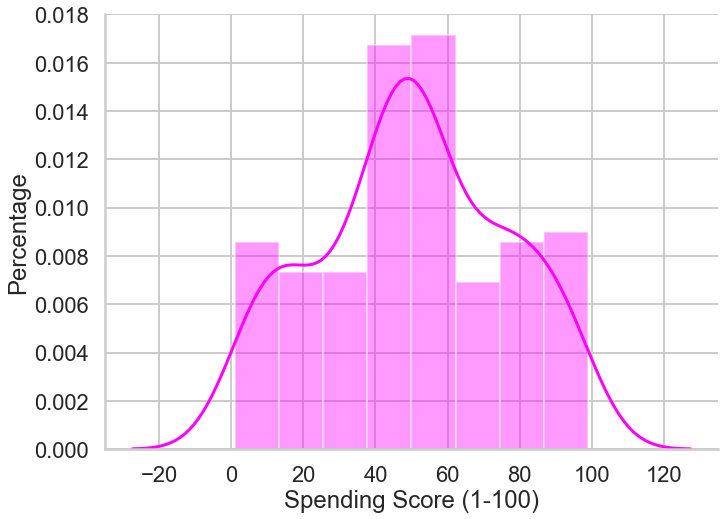

In [13]:
#distribution of spending score
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
spending_percentage = dfmallcustomer['Spending Score (1-100)'].value_counts(dropna=False) / dfmallcustomer.shape[0] * 100
sns.distplot(dfmallcustomer['Spending Score (1-100)'].dropna(), color='magenta')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Percentage')
sns.despine()
print(spending_percentage)

The distribution is very close to normal and most of the customers have scores between 40-60.

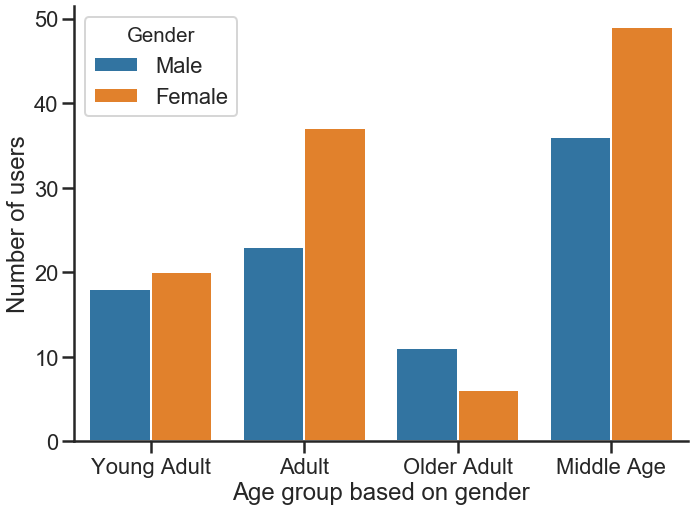

In [14]:
#age groups based on gender
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Age', hue='Gender',data=stmallcustomer)
plt.xlabel('Age group based on gender')
plt.ylabel('Number of users')
sns.despine()

Female customers are the majority for each age group except older adults 

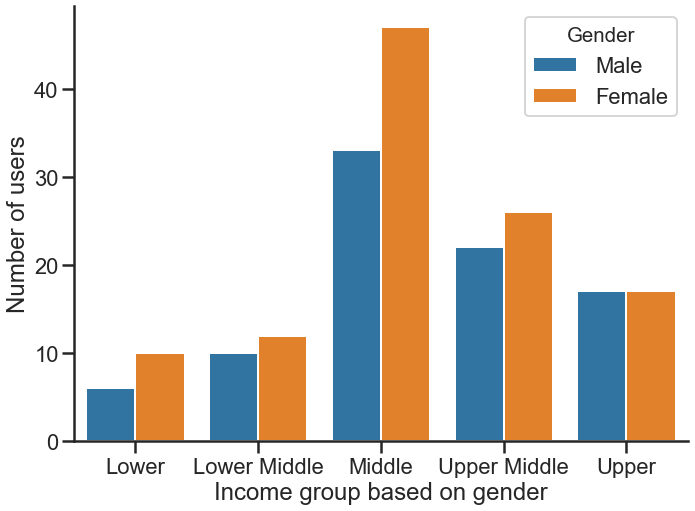

In [15]:
#income groups based on gender
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Annual Income (k$)', hue='Gender',data=stmallcustomer)
plt.xlabel('Income group based on gender')
plt.ylabel('Number of users')
sns.despine()

Females are again the majority group in all income groups.

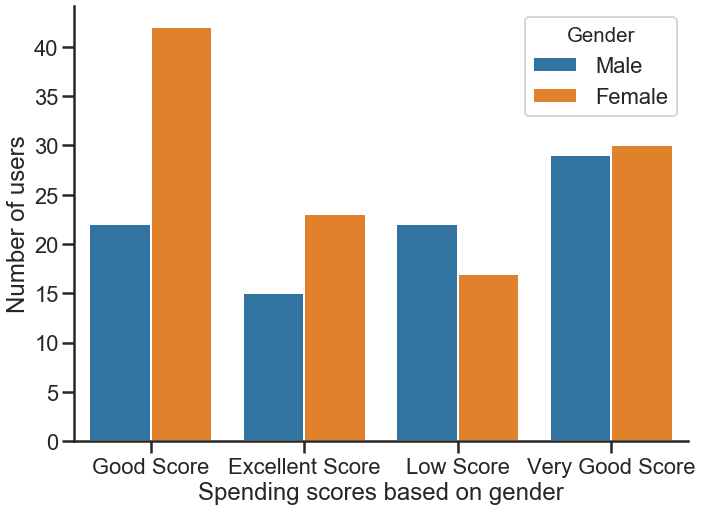

In [16]:
#spending score groups based on gender
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Spending Score (1-100)', hue='Gender',data=stmallcustomer)
plt.xlabel('Spending scores based on gender')
plt.ylabel('Number of users')
sns.despine()

Majority of customers are female in all spending score categories except low score. 

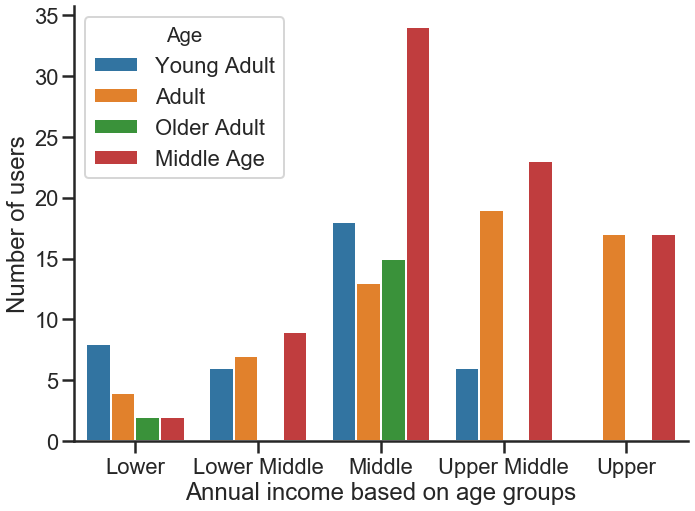

In [18]:
#Annual income based on age groups
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Annual Income (k$)', hue='Age',data=stmallcustomer)
plt.xlabel('Annual income based on age groups')
plt.ylabel('Number of users')
sns.despine()

Middle age customers have middle annual income. In upper group, there is young adults and older adults. This totally makes sense because older adults might probably get retired while young adults either do not have a job or in their early career.  

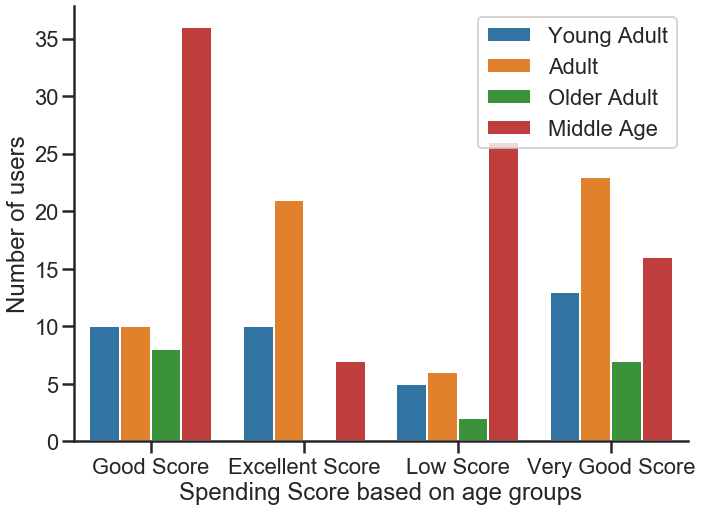

In [20]:
#Spending scores based on age groups
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Spending Score (1-100)', hue='Age',data=stmallcustomer)
plt.legend(loc='upper right')
plt.xlabel('Spending Score based on age groups')
plt.ylabel('Number of users')
sns.despine()

Older adults do not have excellent score. Adults have the best scores (very good and excellent score)

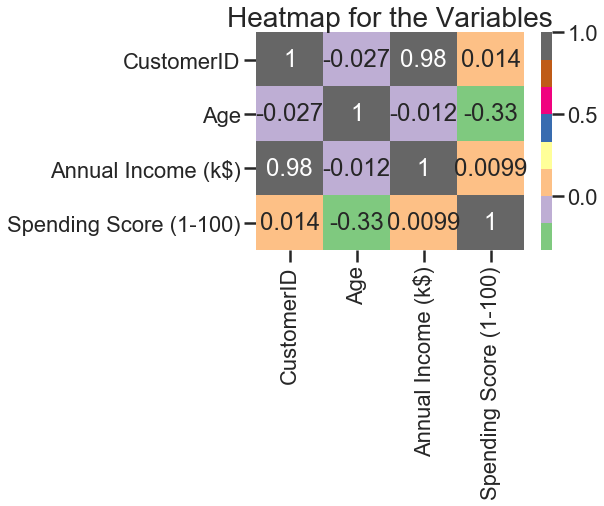

In [28]:
#check the correlation 
fig.set_size_inches(11, 8)
sns.heatmap(dfmallcustomer.corr(), cmap='Accent', annot = True)
plt.title('Heatmap for the Variables', fontsize = 28)
plt.show()

Eliminating customer ID as the label variable, it can be said that we can include all variables for our analysis because there is not good correlation between variables. The best correlation is seen between age and spending score, which is still not good (-0.33).